In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
bikes=pd.read_csv('hour.csv')

In [3]:
bikes_prep=bikes.copy()

In [4]:
bikes_prep=bikes_prep.drop(['index','date','casual','registered'],axis=1)

In [5]:
bikes_prep.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

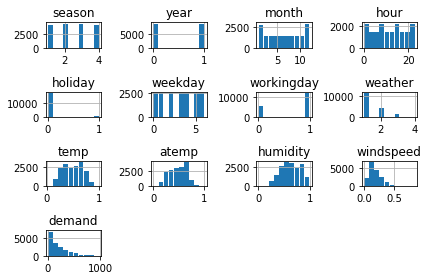

In [6]:
bikes_prep.hist(rwidth=0.9)
plt.tight_layout()

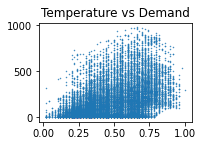

In [7]:
plt.subplot(2,2,1)
plt.title('Temperature vs Demand')
plt.scatter(bikes_prep['temp'],bikes_prep['demand'],s=.2)

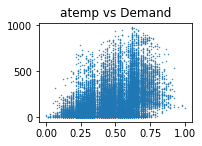

In [8]:
plt.subplot(2,2,2)
plt.title('atemp vs Demand')
plt.scatter(bikes_prep['atemp'],bikes_prep['demand'],s=.2)

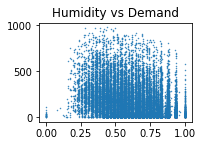

In [9]:
plt.subplot(2,2,3)
plt.title('Humidity vs Demand')
plt.scatter(bikes_prep['humidity'],bikes_prep['demand'],s=.2)

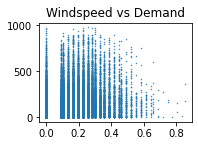

In [10]:
plt.subplot(2,2,4)
plt.title('Windspeed vs Demand')
plt.scatter(bikes_prep['windspeed'],bikes_prep['demand'],s=.2)

In [11]:
cat_list=bikes_prep['season'].unique()
cat_average=bikes_prep.groupby('season').mean()['demand']

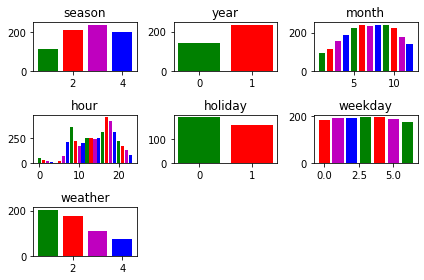

In [12]:
catvar=['season','year','month','hour','holiday','weekday','weather']
a=1
for columns in catvar:
    cat_list=bikes_prep[columns].unique()
    cat_average=bikes_prep.groupby(columns).mean()['demand']
    plt.subplot(3,3,a)
    plt.title(columns)
    colours=['g','r','m','b']
    plt.bar(cat_list,cat_average,color=colours)
    plt.tight_layout()
    a=a+1

In [13]:
bikes_prep['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [14]:
bikes_prep['demand'].quantile([0.05,0.1,0.15,0.9,0.95,0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

In [15]:
coorelation=bikes_prep[['atemp','temp','humidity','windspeed','demand']].corr()

In [16]:
coorelation

,atemp,temp,humidity,windspeed,demand
atemp,1.000000,0.987672,-0.051918,-0.062336,0.400929
temp,0.987672,1.000000,-0.069881,-0.023125,0.404772
humidity,-0.051918,-0.069881,1.000000,-0.290105,-0.322911
windspeed,-0.062336,-0.023125,-0.290105,1.000000,0.093234
demand,0.400929,0.404772,-0.322911,0.093234,1.000000


In [17]:
bikes_prep=bikes_prep.drop(['atemp','windspeed','weekday','year','workingday'],axis=1)

In [18]:
bikes_prep

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,16
1,1,1,1,0,1,0.22,0.80,40
2,1,1,2,0,1,0.22,0.80,32
3,1,1,3,0,1,0.24,0.75,13
4,1,1,4,0,1,0.24,0.75,1
...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,119
17375,1,12,20,0,2,0.26,0.60,89
17376,1,12,21,0,1,0.26,0.60,90
17377,1,12,22,0,1,0.26,0.56,61


In [19]:
df1=pd.to_numeric(bikes_prep['demand'], downcast='float')

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474717, 0.4704956 , 0.49622816, 0.49404055, 0.46795937,
        0.47732046, 0.5267577 , 0.5914575 , 0.6520158 , 0.71519554,
        0.8059103 , 0.9253097 , 1.        , 0.9253097 , 0.8059103 ,
        0.71519554, 0.6520158 , 0.5914575 , 0.5267577 , 0.47732046,
        0.46795937, 0.49404055, 0.49622816, 0.4704956 , 0.45474717],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x193e8168dc0>)

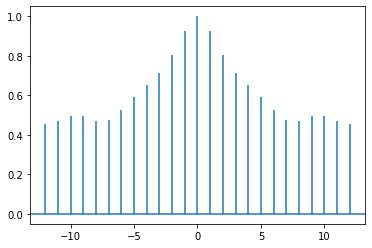

In [20]:
plt.acorr(df1,maxlags=12)

<AxesSubplot:>

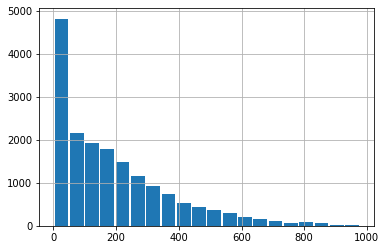

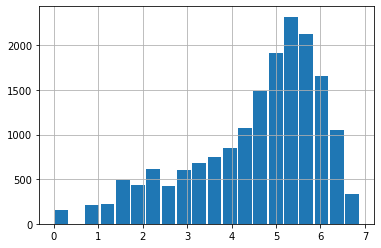

In [21]:
df1=bikes_prep['demand']
df2=np.log(df1)
plt.figure()
df1.hist(rwidth=0.9,bins=20)
plt.figure()
df2.hist(rwidth=0.9,bins=20)

In [22]:
bikes_prep['demand']=np.log(bikes_prep['demand'])

In [23]:
t_1=bikes_prep['demand'].shift(+1).to_frame()
t_1.columns=['t-1']
t_2=bikes_prep['demand'].shift(+2).to_frame()
t_2.columns=['t-2']
t_3=bikes_prep['demand'].shift(+3).to_frame()
t_3.columns=['t-3']

In [24]:
bikes_prep_lag=pd.concat([bikes_prep,t_1,t_2,t_3],axis=1)

In [25]:
bikes_prep_lag=bikes_prep_lag.dropna()


In [26]:
col_mn=['season','holiday','weather','month','hour']
for columns in col_mn:
    bikes_prep_lag[columns]=bikes_prep_lag[columns].astype('category')

In [27]:
bikes_prep_lag=pd.get_dummies(bikes_prep_lag,drop_first=True)

In [28]:
bikes_prep_lag


,temp,humidity,demand,t-1,t-2,t-3,season_2,season_3,season_4,month_2,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.26,0.60,4.779123,4.804021,5.099866,5.365976,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
17375,0.26,0.60,4.488636,4.779123,4.804021,5.099866,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
17376,0.26,0.60,4.499810,4.488636,4.779123,4.804021,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
17377,0.26,0.56,4.110874,4.499810,4.488636,4.779123,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [29]:
Y=bikes_prep_lag['demand']
X=bikes_prep_lag.drop(['demand'],axis=1)


In [30]:
tr_size=0.7*len(X)
tr_size=int(tr_size)

In [31]:
x_train=X.values[0:tr_size]
x_test=X.values[tr_size:len(X)]
y_train=Y.values[0:tr_size]
y_test=Y.values[tr_size:len(Y)]


In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
std_reg=LinearRegression()
std_reg.fit(x_train,y_train)

LinearRegression()

In [34]:
r2_train=std_reg.score(x_train,y_train)
r2_test=std_reg.score(x_test,y_test)

In [35]:
y_predict=std_reg.predict(x_test)


In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
rmse=math.sqrt(mean_squared_error(y_test,y_predict))

In [47]:
y_test_e=[]
y_predict_e=[]


In [54]:
for i in range(0,len(y_test)):
    y_test_e.append(math.exp(y_test[i]))
    y_predict_e.append(math.exp(y_predict[i]))
                       

In [56]:
log_sq_sum=0.0
for i in range(0, len(y_test_e)):
    log_a= math.log(y_test_e[i]+1)
    log_p= math.log(y_predict_e[i]+1)
    log_diff=(log_p-log_a)**2
    log_sq_sum=log_sq_sum+log_diff
rmsle=math.sqrt(log_sq_sum/len(y_test))    

In [57]:
print("")
print(rmsle)


0.503593205683141


In [58]:
log_sq_sum = 0.0

for i in range(0, len(y_test_e)):
    log_a = math.log(y_test_e[i] + 1)
    log_p = math.log(y_predict_e[i] + 1)
    log_diff = (log_p - log_a)**2
    log_sq_sum = log_sq_sum + log_diff

rmsle = math.sqrt(log_sq_sum/len(y_test))

print(rmsle)

0.503593205683141
